<a href="https://colab.research.google.com/github/enzoampil/data-science-demos/blob/master/time-series/Introduction_to_forecasting_Philippine_stock%C2%A0prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas
!pip install datetime
!pip install lxml
!pip install fbprophet

In [0]:
import pandas as pd

In [0]:
jfc = pd.read_csv('jfc_20130901_to_20190426.csv')
jfc['CHART_DATE'] = pd.to_datetime(jfc.CHART_DATE)

In [28]:
jfc.tail()

,Unnamed: 0,CHART_DATE,CLOSE,HIGH,LOW,OPEN,VALUE
1384,1384,2019-04-22,303.0,309.8,302.6,304.0,395456306.0
1385,1385,2019-04-23,302.2,304.4,301.4,303.0,291312114.0
1386,1386,2019-04-24,300.4,302.8,300.0,301.8,343598008.0
1387,1387,2019-04-25,303.0,307.6,301.0,301.0,274904516.0
1388,1388,2019-04-26,303.0,305.0,301.2,303.0,149795242.0


Text(0.5, 1.0, 'Jollibee Daily Closing Price')

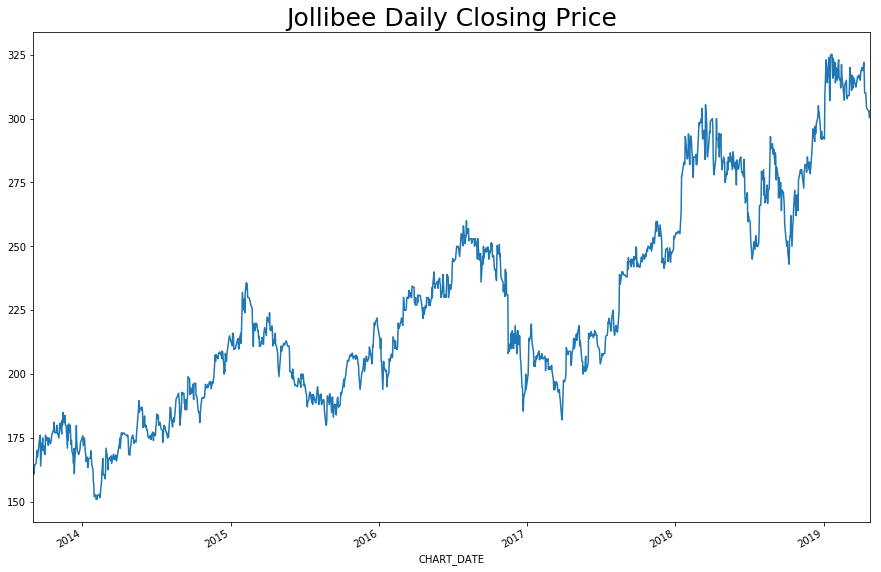

In [29]:
jfc.set_index('CHART_DATE').CLOSE.plot(figsize=(15, 10))
plt.title('Jollibee Daily Closing Price', fontsize=25)

In [9]:
from fbprophet import Prophet
#Forecasting closing prices
ts = jfc[['CHART_DATE', 'CLOSE']]
ts.columns = ['ds', 'y']
ts.head()

,ds,y
0,2013-09-02,162.1
1,2013-09-03,162.0
2,2013-09-13,168.5
3,2013-09-04,160.9
4,2013-09-05,164.5


In [0]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
future = m.make_future_dataframe(periods=7*4*12, freq='D')

Text(0.5, 1.0, 'Jollibee: Forecasted Daily Closing Price')

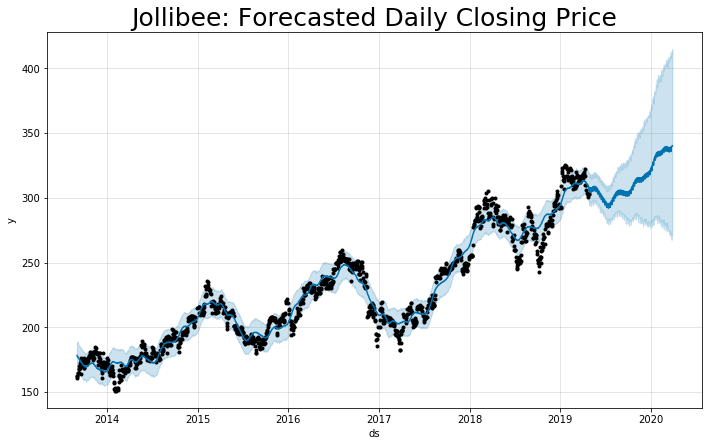

In [12]:
pred = m.predict(future)

from matplotlib import pyplot as plt
fig1 = m.plot(pred)
plt.title('Jollibee: Forecasted Daily Closing Price', fontsize=25)

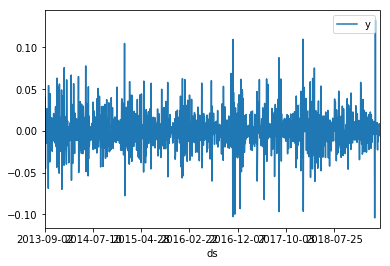

In [19]:
#Plotting returns of JFC
ts_pct = ts.set_index('ds').pct_change()
ts_pct.plot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f137a1a5240>]],
      dtype=object)

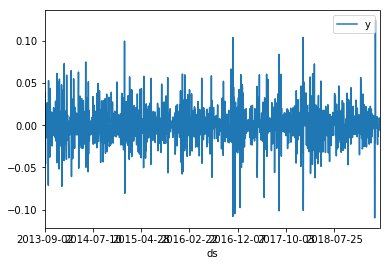

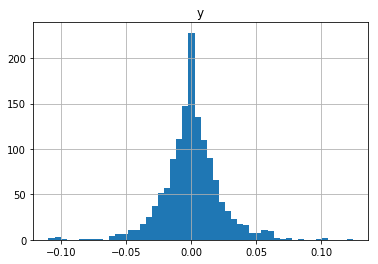

In [20]:
#Plotting log returns of JFC
import numpy as np

ts_pct = np.log(ts.set_index('ds').pct_change() + 1)
ts_pct.plot()

ts_pct.hist(bins=50)

In [0]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts_pct.reset_index())
future = m.make_future_dataframe(periods=7*4*12, freq='D')

Text(0.5, 1.0, 'Jollibee: Forecasted Daily Returns')

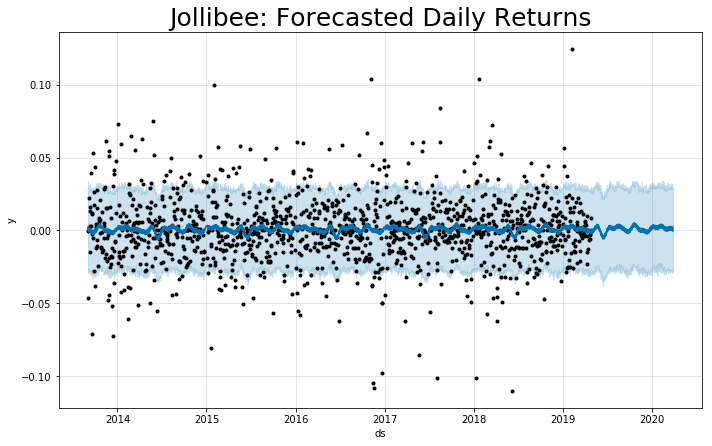

In [22]:
pred = m.predict(future)

from matplotlib import pyplot as plt
fig1 = m.plot(pred)
plt.title('Jollibee: Forecasted Daily Returns', fontsize=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f137b7d0668>]],
      dtype=object)

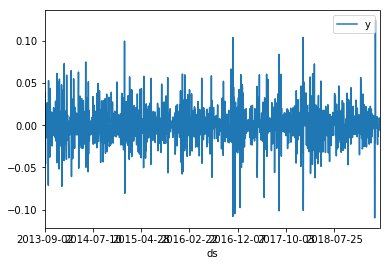

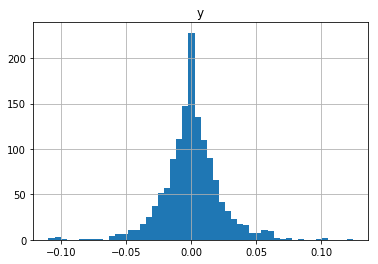

In [23]:
#log first difference of JFC
import numpy as np

ts_pct = np.log(ts.set_index('ds')).diff()
ts_pct.plot()

ts_pct.hist(bins=50)

Text(0.5, 1.0, 'Jollibee: Forecasted Daily Returns')

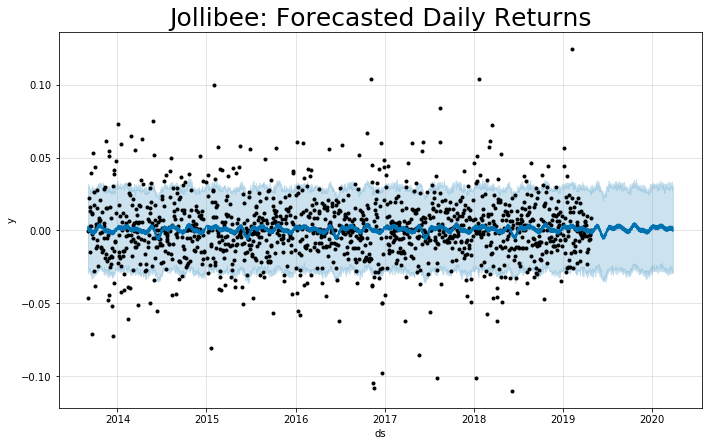

In [24]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts_pct.reset_index())
future = m.make_future_dataframe(periods=7*4*12, freq='D')
pred = m.predict(future)

from matplotlib import pyplot as plt
fig1 = m.plot(pred)
plt.title('Jollibee: Forecasted Daily Returns', fontsize=25)